In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [40]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

In [41]:
# Laden des CIFAR-10 Datensatzes
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader für das Training und Testen
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


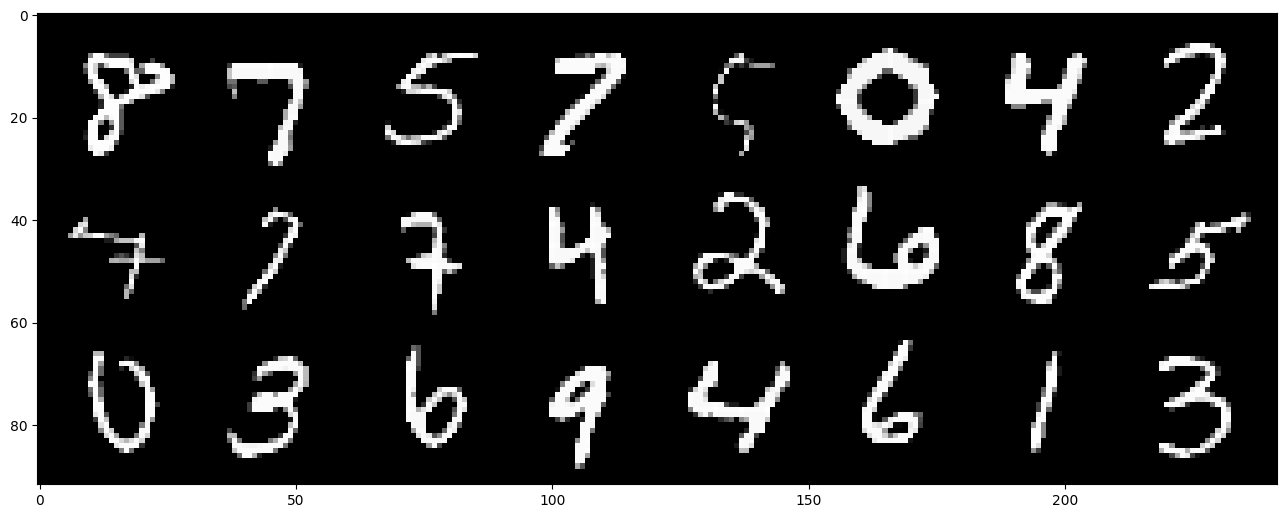

In [42]:
samples, labels = next(iter(train_loader))
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples[:24])
np_grid_imgs = grid_imgs.numpy()
# in tensor, image is (batch, width, height), so you have to transpose it to (width, height, batch) in numpy to show it.
plt.imshow(np.transpose(np_grid_imgs, (1,2,0)))

In [58]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

# Modellinitialisierung, Loss-Funktion und Optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [59]:
epochs = 3

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 2.192
[1,   400] loss: 1.107
[1,   600] loss: 0.413
[1,   800] loss: 0.310
[1,  1000] loss: 0.263
[1,  1200] loss: 0.211
[1,  1400] loss: 0.210
[1,  1600] loss: 0.185
[1,  1800] loss: 0.171
[2,   200] loss: 0.141
[2,   400] loss: 0.144
[2,   600] loss: 0.123
[2,   800] loss: 0.123
[2,  1000] loss: 0.108
[2,  1200] loss: 0.113
[2,  1400] loss: 0.091
[2,  1600] loss: 0.101
[2,  1800] loss: 0.107
[3,   200] loss: 0.088
[3,   400] loss: 0.095
[3,   600] loss: 0.087
[3,   800] loss: 0.079
[3,  1000] loss: 0.078
[3,  1200] loss: 0.083
[3,  1400] loss: 0.073
[3,  1600] loss: 0.086
[3,  1800] loss: 0.070
Finished Training


In [60]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Genauigkeit des Netzes auf den 10000 Testbildern: %d %%' % (100 * correct / total))

Genauigkeit des Netzes auf den 10000 Testbildern: 97 %
